![](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_UcFQAjh.max-800x600.png) ![](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_1_kxflIxg.max-800x600.png)

![](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_2_EnQyi4S.max-800x600.png) ![](https://d3s0tskafalll9.cloudfront.net/media/images/Untitled_3_ddZedfW.max-800x600.png)  


In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import re
import numpy as np
import matplotlib.pyplot as plt
print("Ïäù=3")

Ïäù=3


In [2]:
# Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî© Î†àÏù¥Ïñ¥
class PositionalEncoding(tf.keras.layers.Layer):

  def __init__(self, position, d_model):
    super(PositionalEncoding, self).__init__()
    self.pos_encoding = self.positional_encoding(position, d_model)

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

  def positional_encoding(self, position, d_model):
    # Í∞ÅÎèÑ Î∞∞Ïó¥ ÏÉùÏÑ±
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)

    # Î∞∞Ïó¥Ïùò ÏßùÏàò Ïù∏Îç±Ïä§ÏóêÎäî sin Ìï®Ïàò Ï†ÅÏö©
    sines = tf.math.sin(angle_rads[:, 0::2])
    # Î∞∞Ïó¥Ïùò ÌôÄÏàò Ïù∏Îç±Ïä§ÏóêÎäî cosine Ìï®Ïàò Ï†ÅÏö©
    cosines = tf.math.cos(angle_rads[:, 1::2])

    # sinÍ≥º cosineÏù¥ ÍµêÏ∞®ÎêòÎèÑÎ°ù Ïû¨Î∞∞Ïó¥
    pos_encoding = tf.stack([sines, cosines], axis=0)
    pos_encoding = tf.transpose(pos_encoding,[1, 2, 0]) 
    pos_encoding = tf.reshape(pos_encoding, [position, d_model])

    pos_encoding = pos_encoding[tf.newaxis, ...]
    return tf.cast(pos_encoding, tf.float32)

  def call(self, inputs):
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

print("Ïäù=3")

Ïäù=3


ÌñâÏùò ÌÅ¨Í∏∞Í∞Ä 50, Ïó¥Ïùò ÌÅ¨Í∏∞Í∞Ä 512Ïù∏ ÌñâÎ†¨ÏùÑ Í∑∏Î†§Î¥ÖÏãúÎã§. Ïù¥Î•ºÌÖåÎ©¥, ÏµúÎåÄ Î¨∏Ïû•Ïùò Í∏∏Ïù¥Í∞Ä 50Ïù¥Í≥† ÏõåÎìú ÏûÑÎ≤†Îî© Ï∞®ÏõêÏùÑ 512Î°ú ÌïòÎäî Î™®Îç∏Ïùò ÏûÖÎ†• Î≤°ÌÑ∞ Î™®ÏñëÏù¥ Ïù¥ÏôÄ Í∞ôÏùÑ Í≤ÉÏûÖÎãàÎã§.

Q.ÏúÑÏùò Î¨∏Ïû•Ï≤òÎüº ÌñâÏùò ÌÅ¨Í∏∞Í∞Ä 50, Ïó¥Ïùò ÌÅ¨Í∏∞Í∞Ä 512Ïù∏ ÌñâÎ†¨ÏùÑ ÎßåÎìúÎäî ÏΩîÎìúÎ•º ÏôÑÏÑ±ÌïòÏó¨ ÏûÖÎ†• Î≤°ÌÑ∞ Î™®ÏñëÏùÑ ÏãúÍ∞ÅÌôîÌïòÏÑ∏Ïöî.
(Ï∂îÍ∞Ä : ÏïÑÎûò ÌÄ¥Ï¶àÎ•º ÌíÄÎ©¥ÏÑú ÏûëÏÑ±Ìïú ÏΩîÎìúÎ•º Î≥ÄÍ≤ΩÌï¥Î≥¥ÏÑ∏Ïöî.)

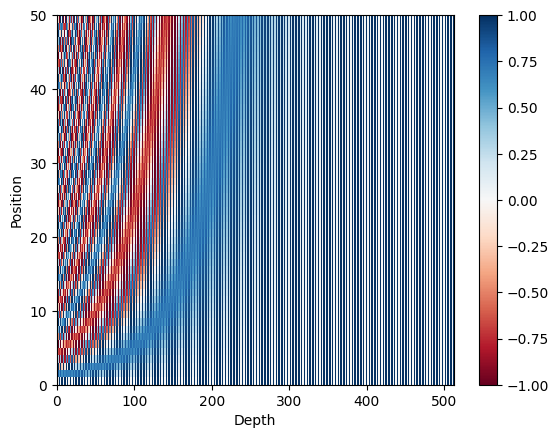

In [3]:
# Positional Encoding Í∞ùÏ≤¥ ÏÉùÏÑ± (Ïòà: 50Í∞ú ÏúÑÏπò, 512 Ï∞®Ïõê)
sample_pos_encoding = PositionalEncoding(50, 512)

# ÏãúÍ∞ÅÌôî
plt.pcolormesh(sample_pos_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 512))
plt.ylabel('Position')
plt.colorbar()
plt.show()

Q. ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏù¥ 256Ïù¥Í≥† ÏµúÎåÄ Î¨∏Ïû•Ïùò Í∏∏Ïù¥Í∞Ä 30Ïù∏ ÌÖçÏä§Ìä∏Î•º ÏûÖÎ†•ÏúºÎ°ú ÌïòÎäî Ìä∏ÎûúÏä§Ìè¨Î®∏Î•º Íµ¨ÌòÑÌïúÎã§Í≥† ÌïòÏòÄÏùÑ Îïå, Ï†ÅÏ†àÌïú Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî© ÌñâÎ†¨Ïùò ÌÅ¨Í∏∞Î•º Ï∂îÏ∏°Ìï¥Î≥¥Í≥† ÏúÑÏóê Íµ¨ÌòÑÌïú Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî© Î†àÏù¥Ïñ¥Î•º ÏÇ¨Ïö©Ìï¥ ÌëúÌòÑÌï¥ Î≥¥ÏÑ∏Ïöî.

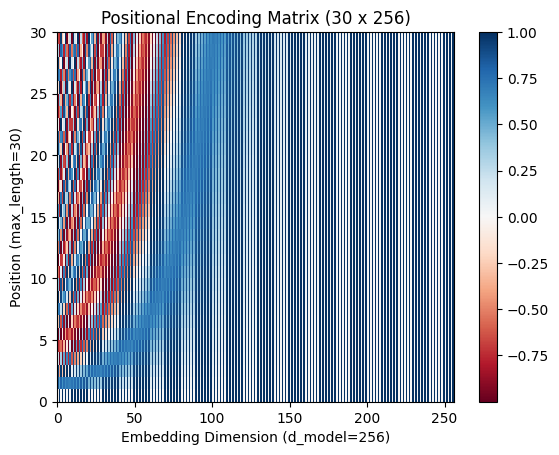

Positional Encoding Shape: (1, 30, 256)


In [4]:
# Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî© Î†àÏù¥Ïñ¥ Ï†ïÏùò
max_length = 30    # ÏµúÎåÄ Î¨∏Ïû• Í∏∏Ïù¥
d_model = 256     # ÏûÑÎ≤†Îî© Ï∞®Ïõê

# Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî© Í∞ùÏ≤¥ ÏÉùÏÑ±
positional_encoding = PositionalEncoding(max_length, d_model)

# ÏãúÍ∞ÅÌôî
# plt.figure(figsize=(10, 8))
plt.pcolormesh(positional_encoding.pos_encoding.numpy()[0], cmap='RdBu')
plt.xlabel('Embedding Dimension (d_model=256)')
plt.xlim((0, d_model))
plt.ylabel('Position (max_length=30)')
plt.title('Positional Encoding Matrix (30 x 256)')
plt.colorbar()
plt.show()

# ÌñâÎ†¨ ÌÅ¨Í∏∞ ÌôïÏù∏
print("Positional Encoding Shape:", positional_encoding.pos_encoding.shape)

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/Untitled_12_SIe2V15.png) ![](https://d3s0tskafalll9.cloudfront.net/media/original_images/Untitled_11_tFFhFjx.png)

Ïñ¥ÌÖêÏÖò Ìï®ÏàòÎäî Ï£ºÏñ¥ÏßÑ 'ÏøºÎ¶¨(Query)'Ïóê ÎåÄÌï¥ÏÑú Î™®Îì† 'ÌÇ§(Key)'ÏôÄÏùò Ïú†ÏÇ¨ÎèÑÎ•º Í∞ÅÍ∞Å Íµ¨Ìï©ÎãàÎã§.

Îã®, Ïó¨Í∏∞ÏÑú 'Îã®Ïñ¥ Î≤°ÌÑ∞' ÎûÄ Ï¥àÍ∏∞ ÏûÖÎ†•ÏúºÎ°ú ÏÇ¨Ïö©ÎêòÏóàÎçò ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Í∞Ä ÏïÑÎãàÍ≥†, Ìä∏ÎûúÏä§Ìè¨Î®∏Ïùò Ïó¨Îü¨ Ïó∞ÏÇ∞ÏùÑ Í±∞Ïπú ÌõÑÏùò Îã®Ïñ¥ Î≤°ÌÑ∞ ÏûÖÎãàÎã§.

Í∑∏Îüº ÏúÑ ÏÑ∏ Í∞ÄÏßÄ Ïñ¥ÌÖêÏÖòÏù¥ ÌïòÎäî ÏùºÏùÑ Ï°∞Í∏à Îçî ÏûêÏÑ∏Ìûà ÏïåÏïÑÎ≥¥Í≤†ÏäµÎãàÎã§.

Ïù∏ÏΩîÎçî ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖò : Ïù∏ÏΩîÎçîÏùò ÏûÖÎ†•ÏúºÎ°ú Îì§Ïñ¥Í∞Ñ Î¨∏Ïû• ÎÇ¥ Îã®Ïñ¥Îì§Ïù¥ ÏÑúÎ°ú Ïú†ÏÇ¨ÎèÑÎ•º Íµ¨ÌïúÎã§.
ÎîîÏΩîÎçî ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖò : Îã®Ïñ¥Î•º 1Í∞úÏî© ÏÉùÏÑ±ÌïòÎäî ÎîîÏΩîÎçîÍ∞Ä Ïù¥ÎØ∏ ÏÉùÏÑ±Îêú Ïïû Îã®Ïñ¥Îì§Í≥ºÏùò Ïú†ÏÇ¨ÎèÑÎ•º Íµ¨ÌïúÎã§.
Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçî Ïñ¥ÌÖêÏÖò : ÎîîÏΩîÎçîÍ∞Ä Ïûò! ÏòàÏ∏°ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú Ïù∏ÏΩîÎçîÏóê ÏûÖÎ†•Îêú Îã®Ïñ¥Îì§Í≥º Ïú†ÏÇ¨ÎèÑÎ•º Íµ¨ÌïúÎã§.
Î¨¥Î†§ ÏÑ∏ Í∞ÄÏßÄ Ïñ¥ÌÖêÏÖò Ï§ë Îëê Í∞ÄÏßÄÍ∞Ä ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖòÏù∏Îç∞Ïöî.

Ïûê, Í∑∏Îüº ÎåÄÏ≤¥ ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖòÏù¥ Ïñ¥Îñ§ ÏùòÎØ∏Î•º Í∞ÄÏßÄÍ≥† ÏûàÏúºÎ©∞ Ìä∏ÎûúÏä§Ìè¨Î®∏ÏóêÏÑú Ïôú Ï§ëÏöîÌïúÏßÄ Ïù¥Ìï¥Ìï¥ Î≥ºÍπåÏöî?

ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖò(Self Attention)
ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖòÏù¥ÎûÄ Ïú†ÏÇ¨ÎèÑÎ•º Íµ¨ÌïòÎäî ÎåÄÏÉÅÏù¥ Îã§Î•∏ Î¨∏Ïû•Ïùò Îã®Ïñ¥Í∞Ä ÏïÑÎãàÎùº ÌòÑÏû¨ Î¨∏Ïû• ÎÇ¥Ïùò Îã®Ïñ¥Îì§Ïù¥ ÏÑúÎ°ú Ïú†ÏÇ¨ÎèÑÎ•º Íµ¨ÌïòÎäî Í≤ΩÏö∞Î•º ÎßêÌï©ÎãàÎã§. Í∞ÄÎ†π, ÏúÑÏóêÏÑú Ïñ∏Í∏âÌïú Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçî Ïñ¥ÌÖêÏÖòÏùÄ ÏÑúÎ°ú Îã§Î•∏ Îã®Ïñ¥ Î™©Î°ù(Ïù∏ÏΩîÎçî ÎÇ¥ Îã®Ïñ¥ÏôÄ ÎîîÏΩîÎçî ÎÇ¥ Îã®Ïñ¥) ÏÇ¨Ïù¥ÏóêÏÑú Ïú†ÏÇ¨ÎèÑÎ•º Íµ¨ÌïòÍ∏∞Ïóê ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖòÏù¥ ÏïÑÎãôÎãàÎã§.

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/Untitled_13_hjMyZwL.png)  
https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html


ÏúÑÏùò Í∑∏Î¶ºÏùÄ Íµ¨Í∏Ä AI Î∏îÎ°úÍ∑∏ Ìè¨Ïä§Ìä∏ÏóêÏÑú Í∞ÄÏ†∏ÏôîÏäµÎãàÎã§. ÏúÑÏùò ÏòàÏãú Î¨∏Ïû•ÏùÑ Î≤àÏó≠ÌïòÎ©¥ 'Í∑∏ ÎèôÎ¨ºÏùÄ Í∏∏ÏùÑ Í±¥ÎÑàÏßÄ ÏïäÏïòÎã§. ÏôúÎÉêÌïòÎ©¥ Í∑∏Í≤ÉÏùÄ ÎÑàÎ¨¥ ÌîºÍ≥§ÌïòÏòÄÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§.' ÎùºÎäî ÏùòÎØ∏Í∞Ä Îê©ÎãàÎã§. Í∑∏Îü∞Îç∞ Ïó¨Í∏∞ÏÑú Í∑∏Í≤É(it) Ïóê Ìï¥ÎãπÌïòÎäî Í≤ÉÏùÄ Í≥ºÏó∞ Í∏∏(street) ÏùºÍπåÏöî? ÎèôÎ¨º(animal) ÏùºÍπåÏöî?


Ïö∞Î¶¨Îäî ÎèôÎ¨ºÏù¥ÎùºÎäî Í≤ÉÏùÑ ÏâΩÍ≤å Ïïå Ïàò ÏûàÏßÄÎßå, Í∏∞Í≥ÑÎäî Í∑∏Î†áÏßÄ ÏïäÏäµÎãàÎã§. ÌïòÏßÄÎßå ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖòÏùÄ ÏûÖÎ†• Î¨∏Ïû• ÎÇ¥Ïùò Îã®Ïñ¥Îì§ÎÅºÎ¶¨ Ïú†ÏÇ¨ÎèÑÎ•º Íµ¨ÌïòÏó¨ Í∑∏Í≤É(it) Ïù¥ ÎèôÎ¨º(animal) Í≥º Ïó∞Í¥ÄÎêòÏóàÏùÑ ÌôïÎ•†Ïù¥ ÎÜíÎã§Îäî Í≤ÉÏùÑ Ï∞æÏïÑÎÉÖÎãàÎã§. Í∑∏Îü∞Îç∞ Ìïú Í∞ÄÏßÄ ÏùòÎ¨∏Ïù¥ Îì≠ÎãàÎã§. Ïú†ÏÇ¨ÎèÑÎäî Ïñ¥ÎñªÍ≤å Íµ¨Ìï†ÍπåÏöî?

### **Ïä§ÏºÄÏùºÎìú Îã∑ ÌîÑÎ°úÎçïÌä∏ Ïñ¥ÌÖêÏÖò**

ÏïûÏÑú Ïñ¥ÌÖêÏÖòÏù¥ Îã®Ïñ¥Îì§ Í∞ÑÏùò Ïú†ÏÇ¨ÎèÑÎ•º Íµ¨ÌïòÎäî Î©îÏª§ÎãàÏ¶òÏù¥ÎùºÍ≥† ÌñàÏóàÏ£†?  
Í∑∏Î†áÎã§Î©¥ Ïú†ÏÇ¨ÎèÑÎ•º Íµ¨ÌïòÎäî Î∞©Î≤ïÏù¥ ÏûàÏùÑ Í≤ÅÎãàÎã§.  
Ìä∏ÎûúÏä§Ìè¨Î®∏ÏóêÏÑúÎäî Ïñ¥ÌÖêÏÖò Í∞íÏùÑ Íµ¨ÌïòÎäî Î∞©Î≤ïÏúºÎ°ú ÏïÑÎûòÏôÄ Í∞ôÏùÄ ÏàòÏãùÏùÑ ÏÇ¨Ïö©ÌñàÏäµÎãàÎã§.  

$Attention(Q,K,V) = softmax(\frac{QK^T}{\sqrt{d_k}})V$  

$Q, K, V$Îäî Í∞ÅÍ∞Å ÏøºÎ¶¨(Query), ÌÇ§(Key), Í∞í(Value)Î•º ÎÇòÌÉÄÎÉÖÎãàÎã§.
VÎäî Í∞ÅÍ∞Å ÏøºÎ¶¨(Query), ÌÇ§(Key), Í∞í(Value)Î•º ÎÇòÌÉÄÎÉÖÎãàÎã§.

ÏïûÏÑú Ïñ∏Í∏âÌñàÎçò Ïñ¥ÌÖêÏÖò Ìï®ÏàòÏùò Ï†ïÏùòÏôÄ Í≤∞Í¥èÍ∞íÏùÑ Îã§Ïãú ÏÉÅÍ∏∞Ìï¥Î¥ÖÏãúÎã§.

Ïñ¥ÌÖêÏÖò Ìï®ÏàòÎäî Ï£ºÏñ¥ÏßÑ 'ÏøºÎ¶¨(Query)'Ïóê ÎåÄÌï¥ÏÑú Î™®Îì† 'ÌÇ§(Key)'ÏôÄÏùò Ïú†ÏÇ¨ÎèÑÎ•º Í∞ÅÍ∞Å Íµ¨Ìï©ÎãàÎã§. Í∑∏Î¶¨Í≥† Íµ¨Ìï¥ÎÇ∏ Ïù¥ Ïú†ÏÇ¨ÎèÑÎ•º ÌÇ§ÏôÄ ÎßµÌïëÎêòÏñ¥ÏûàÎäî Í∞ÅÍ∞ÅÏùò 'Í∞í(Value)'Ïóê Î∞òÏòÅÌï¥ Ï§çÎãàÎã§. Í∑∏Î¶¨Í≥† Ïú†ÏÇ¨ÎèÑÍ∞Ä Î∞òÏòÅÎêú 'Í∞í(Value)'ÏùÑ Î™®Îëê ÎçîÌï¥ÏÑú Î≠âÏ≥êÏ£ºÎ©¥ Ïù¥Î•º ÏµúÏ¢Ö Í≤∞Í≥ºÏù∏ Ïñ¥ÌÖêÏÖò Í∞í(Attention Value) ÎùºÍ≥† Ìï©ÎãàÎã§.

ÏúÑ Ï†ïÏùòÏôÄ ÏïÑÎûò ÎÇ¥Ïö© ÏÑ∏ Í∞ÄÏßÄÎßå Í∏∞ÏñµÌïòÎ©¥ ÏàòÏãùÏùÑ Í∑∏Î¶ºÏúºÎ°ú Ï†ïÎ¶¨Ìï† Ïàò ÏûàÏäµÎãàÎã§.

Q, K, VÎäî Îã®Ïñ¥ Î≤°ÌÑ∞Î•º ÌñâÏúºÎ°ú ÌïòÎäî Î¨∏Ïû• ÌñâÎ†¨Ïù¥Îã§.
Î≤°ÌÑ∞Ïùò ÎÇ¥Ï†Å(dot product) ÏùÄ Î≤°ÌÑ∞Ïùò Ïú†ÏÇ¨ÎèÑÎ•º ÏùòÎØ∏ÌïúÎã§.
ÌäπÏ†ï Í∞íÏùÑ Î∂ÑÎ™®Î°ú ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏùÄ Í∞íÏùò ÌÅ¨Í∏∞Î•º Ï°∞Ï†àÌïòÎäî Ïä§ÏºÄÏùºÎßÅ(Scaling)ÏùÑ ÏúÑÌï®Ïù¥Îã§.




Ïö∞ÏÑ† $Q$ÏôÄ $K$Ïùò Ï†ÑÏπò ÌñâÎ†¨ÏùÑ Í≥±ÌïòÎäî Í≤ÉÏùÑ Í∑∏Î¶ºÏúºÎ°ú ÌëúÌòÑÌïòÎ©¥ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.  
![](https://d3s0tskafalll9.cloudfront.net/media/original_images/Untitled_15_pUfIgKn.png)  

Î¨∏Ïû• ÌñâÎ†¨ 
$Q$ÏôÄ Î¨∏Ïû• ÌñâÎ†¨
$K$Î•º Í≥±ÌïòÎ©¥ ÏúÑÏùò Í∑∏Î¶ºÍ≥º Í∞ôÏùÄ Ï¥àÎ°ùÏÉâ ÌñâÎ†¨ÏùÑ ÏñªÏùÑ Ïàò ÏûàÏäµÎãàÎã§.


ÏúÑ Ï¥àÎ°ùÏÉâ ÌñâÎ†¨Ïù¥ ÏùòÎØ∏ÌïòÎäî Í∞íÏùÄ Î¨¥ÏóáÏùºÍπåÏöî? ÏòàÎ•º Îì§Ïñ¥ 'am' ÌñâÍ≥º 'student' Ïó¥Ïùò Í∞íÏùÄ 
$Q$ ÌñâÎ†¨Ïóê ÏûàÎçò 'am' Î≤°ÌÑ∞ÏôÄ 
$K$ ÌñâÎ†¨Ïóê ÏûàÎçò 'student Î≤°ÌÑ∞'Ïùò ÎÇ¥Ï†ÅÍ∞íÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§. Í≤∞Íµ≠ Í∞Å Îã®Ïñ¥ Î≤°ÌÑ∞Ïùò Ïú†ÏÇ¨ÎèÑÍ∞Ä Î™®Îëê Í∏∞Î°ùÎêú Ïú†ÏÇ¨ÎèÑ ÌñâÎ†¨Ïù¥ ÎêòÎäî Í≤ÉÏù¥ÏßÄÏöî! 

$K$ ÌñâÎ†¨Ïóê ÏûàÎçò 'student Î≤°ÌÑ∞'Ïùò ÎÇ¥Ï†ÅÍ∞íÏùÑ ÏùòÎØ∏Ìï©ÎãàÎã§. Í≤∞Íµ≠ Í∞Å Îã®Ïñ¥ Î≤°ÌÑ∞Ïùò Ïú†ÏÇ¨ÎèÑÍ∞Ä Î™®Îëê Í∏∞Î°ùÎêú Ïú†ÏÇ¨ÎèÑ ÌñâÎ†¨Ïù¥ ÎêòÎäî Í≤ÉÏù¥ÏßÄÏöî!


Ïù¥ Ïú†ÏÇ¨ÎèÑ Í∞íÏùÑ Ïä§ÏºÄÏùºÎßÅ Ìï¥Ï£ºÍ∏∞ ÏúÑÌï¥ÏÑú ÌñâÎ†¨ Ï†ÑÏ≤¥Î•º ÌäπÏ†ï Í∞íÏúºÎ°ú ÎÇòÎà†Ï£ºÍ≥†, Ïú†ÏÇ¨ÎèÑÎ•º 0Í≥º 1ÏÇ¨Ïù¥Ïùò Í∞íÏúºÎ°ú NormalizeÌï¥Ï£ºÍ∏∞ ÏúÑÌï¥ÏÑú ÏÜåÌîÑÌä∏Îß•Ïä§ Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§. Ïó¨Í∏∞ÍπåÏßÄÍ∞Ä $Q$ÏôÄ $K$Ïùò Ïú†ÏÇ¨ÎèÑÎ•º Íµ¨ÌïòÎäî Í≥ºÏ†ïÏù¥ÎùºÍ≥† Î≥º Ïàò ÏûàÍ≤†ÏäµÎãàÎã§. Ïó¨Í∏∞Ïóê Î¨∏Ïû• ÌñâÎ†¨ $V$ÏôÄ Í≥±ÌïòÎ©¥ Ïñ¥ÌÖêÏÖò Í∞í(Attention Value) Î•º ÏñªÏäµÎãàÎã§.

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/Untitled_16_neA52rZ.png)  
Í≤∞Íµ≠ Ïù¥Î•º Î™®Îëê ÌïòÎÇòÏùò Í∑∏Î¶ºÏúºÎ°ú ÌëúÌòÑÌïòÎ©¥ ÏúÑÏôÄ Í∞ôÏäµÎãàÎã§.


$Attention(Q,K,V) = softmax(\frac{QK^T}{\sqrt{d_k}})V$  

Ïù¥ ÏàòÏãùÏùÄ ÎÇ¥Ï†Å(dot product)ÏùÑ ÌÜµÌï¥ Îã®Ïñ¥ Î≤°ÌÑ∞ Í∞Ñ Ïú†ÏÇ¨ÎèÑÎ•º Íµ¨Ìïú ÌõÑÏóê, ÌäπÏ†ï Í∞íÏùÑ Î∂ÑÎ™®Î°ú ÎÇòÎà†Ï£ºÎäî Î∞©ÏãùÏúºÎ°ú $Q$ÏôÄ $K$Ïùò Ïú†ÏÇ¨ÎèÑÎ•º Íµ¨ÌïòÏòÄÎã§Í≥† ÌïòÏó¨ Ïä§ÏºÄÏùºÎìú Îã∑ ÌîÑÎ°úÎçïÌä∏ Ïñ¥ÌÖêÏÖò(Scaled Dot Product Attention) Ïù¥ÎùºÍ≥† Ìï©ÎãàÎã§. Ïú†ÏÇ¨ÎèÑÎ•º Íµ¨ÌïòÎäî Î∞©Î≤ïÏù¥ Ïä§ÏºÄÏùºÎìú Îã∑ ÌîÑÎ°úÎçïÌä∏(scaled dot product)ÏòÄÍ∏∞ ÎïåÎ¨∏Ïóê Ïù¥Îü∞ Ïù¥Î¶ÑÏù¥ Î∂ôÏùÄ Í≤ÉÏù¥ÏßÄÏöî.  
ÎßåÏïΩÏóê Î∂ÑÎ™®Ïóê ÌäπÏ†ï Í∞íÏùÑ ÎÇòÎà†Ï£ºÎäî Î∂ÄÎ∂ÑÏùÑ ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏïòÎã§Î©¥ Ïñ¥ÌÖêÏÖòÏùò Ïù¥Î¶ÑÏùÄ Î¨¥ÏóáÏùºÍπåÏöî? Í∑∏ Ïñ¥ÌÖêÏÖòÏùÄ ÎãπÏó∞Ìûà Îã∑ ÌîÑÎ°úÎçïÌä∏ Ïñ¥ÌÖêÏÖò(dot product attention) Ïù¥ÎùºÍ≥† Î∂ÄÎ¶ÖÎãàÎã§.

**Q. ÌäπÏ†ï Í∞íÏùÑ Î∂ÑÎ™®Î°ú ÏÇ¨Ïö©ÌïòÏó¨ Ïä§ÏºÄÏùºÎßÅ(Scaling)ÏùÑ ÌïòÎäî Ïù¥Ïú†Îäî Î¨¥ÏóáÏù∏Í∞ÄÏöî?**  
Ïä§ÏºÄÏùºÎßÅÏùÑ ÌïòÏßÄ ÏïäÏúºÎ©¥ Î≤°ÌÑ∞Ïùò ÎÇ¥Ï†Å(dot product) Ïó∞ÏÇ∞Ïùò Í≤∞Í≥ºÍ∞Ä ÏûÖÎ†• Î≤°ÌÑ∞Ïùò Ï∞®Ïõê ÏàòÏóê Îî∞Îùº ÌÅ¨Í∏∞Í∞Ä Îß§Ïö∞ Ïª§ÏßÄÍ≤å ÎêòÍ≥†,  
softmaxÏùò Ï∂úÎ†•Í∞íÏù¥ ÏûëÏïÑÏßÄÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï¥ÏÑú ÏûÖÎãàÎã§. softmaxÏùò Ï∂úÎ†•Í∞íÏù¥ ÏûëÏïÑÏßÄÎ©¥ Ïó≠Ï†ÑÌåå Í≥ºÏ†ïÏóêÏÑú Í∏∞Ïö∏Í∏∞ ÏÜåÏã§ Î¨∏Ï†úÍ∞Ä Î∞úÏÉùÌï† Ïàò ÏûàÏäµÎãàÎã§.

### **Ïä§ÏºÄÏùºÎìú Îã∑ ÌîÑÎ°úÎçïÌä∏ Ïñ¥ÌÖêÏÖò Ìï®Ïàò Íµ¨ÌòÑ**

In [5]:
# Ïä§ÏºÄÏùºÎìú Îã∑ ÌîÑÎ°úÎçïÌä∏ Ïñ¥ÌÖêÏÖò Ìï®Ïàò
def scaled_dot_product_attention(query, key, value, mask):
  # Ïñ¥ÌÖêÏÖò Í∞ÄÏ§ëÏπòÎäî QÏôÄ KÏùò Îã∑ ÌîÑÎ°úÎçïÌä∏
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  # Í∞ÄÏ§ëÏπòÎ•º Ï†ïÍ∑úÌôî
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)

  # Ìå®Îî©Ïóê ÎßàÏä§ÌÅ¨ Ï∂îÍ∞Ä
  if mask is not None:
    logits += (mask * -1e9)

  # softmaxÏ†ÅÏö©
  attention_weights = tf.nn.softmax(logits, axis=-1)

  # ÏµúÏ¢Ö Ïñ¥ÌÖêÏÖòÏùÄ Í∞ÄÏ§ëÏπòÏôÄ VÏùò Îã∑ ÌîÑÎ°úÎçïÌä∏
  output = tf.matmul(attention_weights, value)
  return output

print("Ïäù=3")

Ïäù=3


**Î≥ëÎ†¨Î°ú Ïñ¥ÌÖêÏÖò ÏàòÌñâÌïòÍ∏∞**








Ìä∏ÎûúÏä§Ìè¨Î®∏ÏóêÏÑú num_headsÎùºÎäî Î≥ÄÏàòÎäî Í∏∞Í≥ÑÍ∞Ä Î™á Í∞úÏùò ÎòëÎòëÌïú Î®∏Î¶¨Î•º ÏÇ¨Ïö©Ìï†ÏßÄ,  
Îã§Ïãú ÎßêÌï¥ Î≥ëÎ†¨Ï†ÅÏúºÎ°ú Î™á Í∞úÏùò Ïñ¥ÌÖêÏÖò Ïó∞ÏÇ∞ÏùÑ ÏàòÌñâÌï†ÏßÄÎ•º Í≤∞Ï†ïÌïòÎäî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/Untitled_18_nnOTx9p.png)  

ÏïûÏÑú Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî©ÏóêÏÑú d_modelÏùÄ ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Ïùò Ï∞®ÏõêÏù¥ÎùºÍ≥† Ïñ∏Í∏âÌïú Î∞î ÏûàÏäµÎãàÎã§.  
Í≤∞Íµ≠ Ìä∏ÎûúÏä§Ìè¨Î®∏Ïùò Ï¥àÍ∏∞ ÏûÖÎ†•Ïù∏ Î¨∏Ïû• ÌñâÎ†¨Ïùò ÌÅ¨Í∏∞Îäî Î¨∏Ïû•Ïùò Í∏∏Ïù¥Î•º ÌñâÏúºÎ°ú, d_modelÏùÑ Ïó¥Ïùò ÌÅ¨Í∏∞Î°ú Í∞ÄÏßëÎãàÎã§. 

Ìä∏ÎûúÏä§Ìè¨Î®∏Îäî Ïù¥Î†áÍ≤å ÏûÖÎ†•Îêú Î¨∏Ïû• ÌñâÎ†¨ÏùÑ num_headsÏùò ÏàòÎßåÌÅº Ï™ºÍ∞úÏÑú Ïñ¥ÌÖêÏÖòÏùÑ ÏàòÌñâÌïòÍ≥†,   
Ïù¥Î†áÍ≤å ÏñªÏùÄ num_headsÏùò Í∞úÏàòÎßåÌÅºÏùò Ïñ¥ÌÖêÏÖò Í∞í ÌñâÎ†¨ÏùÑ Îã§Ïãú ÌïòÎÇòÎ°ú concatenateÌï©ÎãàÎã§.  

ÏúÑÏùò Í∑∏Î¶ºÏùÄ num_headsÍ∞Ä 8Í∞úÏù∏ Í≤ΩÏö∞Ïù∏Îç∞, Îã§Ïãú concatenateÌïòÎ©¥ÏÑú Ïó¥Ïùò ÌÅ¨Í∏∞Í∞Ä d_modelÏù¥ Îê©ÎãàÎã§.  

Í∞ÅÏûê Î¨∏Ï†úÏßÄÎ•º ÎÇòÎà†ÏÑú Ìëº ÌõÑÏóê ÎßàÏßÄÎßâÏóê Îã§Ïãú Í≤∞Í≥ºÎ•º Ìï©ÏπúÎã§Í≥† ÎπÑÏú†Ìï¥Î≥º ÏàòÎèÑ ÏûàÍ≤†ÎÑ§Ïöî!  

Q. ÎÖºÎ¨∏ÏóêÏÑú d_modelÏùÄ 512Ïùò Í∞íÏùÑ Í∞ÄÏ°åÎã§Í≥† ÌïòÍ≥†, num_headsÎäî 8Ïùò Í∞íÏùÑ Í∞ÄÏ°åÎã§Í≥† Ìï¥Ïöî.  
Í∑∏Î†áÎã§Î©¥, Ïó∞Í≤∞ÌïòÍ∏∞ Ï†Ñ 8Í∞úÏùò Ïñ¥ÌÖêÏÖò Í∞í(Attention Value) ÌñâÎ†¨Ïùò Ïó¥Ïùò ÌÅ¨Í∏∞Îäî Î™á Ï∞®ÏõêÏù¥ÏóàÏùÑÍπåÏöî?  
512/8 = 64



### **Î©ÄÌã∞-Ìó§Îìú Ïñ¥ÌÖêÏÖò**



![](https://d3s0tskafalll9.cloudfront.net/media/original_images/Untitled_19_FwmaA3q.png)

ÏúÑ Í∑∏Î¶ºÏùÄ num_headsÏùò Í∞íÏù¥ 8Ïùº Îïå, Î≥ëÎ†¨Î°ú ÏàòÌñâÎêòÎäî Ïñ¥ÌÖêÏÖòÏù¥ ÏÑúÎ°ú Îã§Î•∏ ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖò Í≤∞Í≥ºÎ•º ÏñªÏùÑ Ïàò ÏûàÏùåÏùÑ Î≥¥Ïó¨Ï§çÎãàÎã§. Îã§Ïãú ÎßêÌï¥ 8Í∞úÏùò Î®∏Î¶¨Îäî Í∞ÅÍ∞Å Îã§Î•∏ Í¥ÄÏ†êÏóêÏÑú Ïñ¥ÌÖêÏÖòÏùÑ ÏàòÌñâÌïòÎØÄÎ°ú Ìïú Î≤àÏùò Ïñ¥ÌÖêÏÖòÎßå ÏàòÌñâÌñàÎã§Î©¥ ÎÜìÏπ† ÏàòÎèÑ ÏûàÎçò Ï†ïÎ≥¥Î•º Ï∫êÏπòÌï† Ïàò ÏûàÏäµÎãàÎã§. ÏòàÎ•º Îì§Ïñ¥ ÏúÑ Í∑∏Î¶ºÏóêÏÑúÎùºÎ©¥ it_Ïù¥ÎùºÎäî ÌÜ†ÌÅ∞Ïù¥ animal_Í≥º Ïú†ÏÇ¨ÌïòÎã§Í≥† Î≥¥Îäî Í¥ÄÏ†êÍ≥º street_Í≥º Ïú†ÏÇ¨ÌïòÎã§Í≥† Î≥¥Îäî Í¥ÄÏ†êÏù¥ ÌïúÍ∫ºÎ≤àÏóê Î™®Îëê ÌëúÌòÑ Í∞ÄÎä•ÌïòÎã§Îäî ÎúªÏûÖÎãàÎã§.

Ïù¥ÏôÄ Í∞ôÏù¥ Ïñ¥ÌÖêÏÖòÏùÑ Î≥ëÎ†¨Î°ú ÏàòÌñâÌïòÎäî Í≤ÉÏùÑ Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖòÏù¥ÎùºÍ≥† Î∂ÄÎ¶ÖÎãàÎã§.

In [6]:
class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    self.dense = tf.keras.layers.Dense(units=d_model)

  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # Q, K, VÏóê Í∞ÅÍ∞Å DenseÎ•º Ï†ÅÏö©Ìï©ÎãàÎã§
    query = self.query_dense(query)  # QÏóê DenseÎ•º Ï†ÅÏö© / Apply Dense to Q
    key = self.key_dense(key)        # KÏóê DenseÎ•º Ï†ÅÏö© / Apply Dense to K
    value = self.value_dense(value)  # VÏóê DenseÎ•º Ï†ÅÏö© / Apply Dense to V

    # Î≥ëÎ†¨ Ïó∞ÏÇ∞ÏùÑ ÏúÑÌïú Î®∏Î¶¨Î•º Ïó¨Îü¨ Í∞ú ÎßåÎì≠ÎãàÎã§ / Create multiple attention heads
    query = self.split_heads(query, batch_size)  # queryÏóê ÎåÄÌï¥ Ìó§ÎìúÎ•º Î∂ÑÌï† / split heads for query
    key = self.split_heads(key, batch_size)      # keyÏóê ÎåÄÌï¥ Ìó§ÎìúÎ•º Î∂ÑÌï† / split heads for key
    value = self.split_heads(value, batch_size)  # valueÏóê ÎåÄÌï¥ Ìó§ÎìúÎ•º Î∂ÑÌï† / split heads for value

    # Ïä§ÏºÄÏùºÎìú Îã∑ ÌîÑÎ°úÎçïÌä∏ Ïñ¥ÌÖêÏÖò Ìï®Ïàò
    scaled_attention = scaled_dot_product_attention(query, key, value, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # Ïñ¥ÌÖêÏÖò Ïó∞ÏÇ∞ ÌõÑÏóê Í∞Å Í≤∞Í≥ºÎ•º Îã§Ïãú Ïó∞Í≤∞(concatenate)Ìï©ÎãàÎã§
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    # ÏµúÏ¢Ö Í≤∞Í≥ºÏóêÎèÑ DenseÎ•º Ìïú Î≤à Îçî Ï†ÅÏö©Ìï©ÎãàÎã§
    outputs = self.dense(concat_attention)

    return outputs
print("Ïäù=3")

Ïäù=3


### **ÎßàÏä§ÌÇπ**







ÎßàÏä§ÌÇπ(Masking) Ïù¥ÎûÄ, ÌäπÏ†ï Í∞íÎì§ÏùÑ Í∞ÄÎ†§ÏÑú Ïã§Ï†ú Ïó∞ÏÇ∞Ïóê Î∞©Ìï¥Í∞Ä ÎêòÏßÄ ÏïäÎèÑÎ°ù ÌïòÎäî Í∏∞Î≤ïÏûÖÎãàÎã§.

Ìä∏ÎûúÏä§Ìè¨Î®∏ÏóêÏÑúÎäî Ïñ¥ÌÖêÏÖòÏùÑ ÏúÑÌï¥ÏÑú ÌÅ¨Í≤å Îëê Í∞ÄÏßÄ ÎßàÏä§ÌÇπÏùÑ ÏÇ¨Ïö©ÌïúÎã§Í≥† ÌïòÎäîÎç∞Ïöî.

1. Ìå®Îî© ÎßàÏä§ÌÇπ(Padding Masking)
2. Î£©Ïñ¥Ìó§Îìú ÎßàÏä§ÌÇπ(Look-ahead Masking)




In [7]:
def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # (batch_size, 1, 1, sequence length)
  return mask[:, tf.newaxis, tf.newaxis, :]
print("Ïäù=3")

Ïäù=3


In [8]:
print(create_padding_mask(tf.constant([[1, 2, 0, 3, 0], [0, 0, 0, 4, 5]])))

tf.Tensor(
[[[[0. 0. 1. 0. 1.]]]


 [[[1. 1. 1. 0. 0.]]]], shape=(2, 1, 1, 5), dtype=float32)


In [9]:
def create_look_ahead_mask(x):
  seq_len = tf.shape(x)[1]
  look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
  padding_mask = create_padding_mask(x)
  return tf.maximum(look_ahead_mask, padding_mask)
print("Ïäù=3")

Ïäù=3


In [10]:
print(create_look_ahead_mask(tf.constant([[1, 2, 3, 4, 5]])))

tf.Tensor(
[[[[0. 1. 1. 1. 1.]
   [0. 0. 1. 1. 1.]
   [0. 0. 0. 1. 1.]
   [0. 0. 0. 0. 1.]
   [0. 0. 0. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


In [11]:
print(create_look_ahead_mask(tf.constant([[0, 5, 1, 5, 5]])))

tf.Tensor(
[[[[1. 1. 1. 1. 1.]
   [1. 0. 1. 1. 1.]
   [1. 0. 0. 1. 1.]
   [1. 0. 0. 0. 1.]
   [1. 0. 0. 0. 0.]]]], shape=(1, 1, 5, 5), dtype=float32)


### Ïù∏ÏΩîÎçî

In [12]:
# Ïù∏ÏΩîÎçî ÌïòÎÇòÏùò Î†àÏù¥Ïñ¥Î•º Ìï®ÏàòÎ°ú Íµ¨ÌòÑ.
# Ïù¥ ÌïòÎÇòÏùò Î†àÏù¥Ïñ¥ ÏïàÏóêÎäî Îëê Í∞úÏùò ÏÑúÎ∏å Î†àÏù¥Ïñ¥Í∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§.
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

  # Ìå®Îî© ÎßàÏä§ÌÅ¨ ÏÇ¨Ïö©
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # Ï≤´ Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖò ÏàòÌñâ (ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖò)
  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': padding_mask
      })

  # Ïñ¥ÌÖêÏÖòÏùò Í≤∞Í≥ºÎäî DropoutÍ≥º Layer NormalizationÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  # Îëê Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : 2Í∞úÏùò ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µ
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µÏùò Í≤∞Í≥ºÎäî DropoutÍ≥º LayerNormalizationÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)
print("Ïäù=3")

Ïäù=3


In [13]:
def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # Ìå®Îî© ÎßàÏä§ÌÅ¨ ÏÇ¨Ïö©
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî©
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # num_layersÎßåÌÅº ÏåìÏïÑÏò¨Î¶∞ Ïù∏ÏΩîÎçîÏùò Ï∏µ.
  for i in range(num_layers):
    outputs = encoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)
print("Ïäù=3")

Ïäù=3


## ÎîîÏΩîÎçî

In [14]:
# ÎîîÏΩîÎçî ÌïòÎÇòÏùò Î†àÏù¥Ïñ¥Î•º Ìï®ÏàòÎ°ú Íµ¨ÌòÑ.
# Ïù¥ ÌïòÎÇòÏùò Î†àÏù¥Ïñ¥ ÏïàÏóêÎäî ÏÑ∏ Í∞úÏùò ÏÑúÎ∏å Î†àÏù¥Ïñ¥Í∞Ä Ï°¥Ïû¨Ìï©ÎãàÎã§.
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # Ï≤´ Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖò ÏàòÌñâ (ÏÖÄÌîÑ Ïñ¥ÌÖêÏÖò)
  attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': look_ahead_mask
      })

  # Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖòÏùò Í≤∞Í≥ºÎäî LayerNormalizationÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ
  attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

  # Îëê Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : ÎßàÏä§ÌÅ¨Îìú Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖò ÏàòÌñâ (Ïù∏ÏΩîÎçî-ÎîîÏΩîÎçî Ïñ¥ÌÖêÏÖò)
  attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1,
          'key': enc_outputs,
          'value': enc_outputs,
          'mask': padding_mask
      })

  # ÎßàÏä§ÌÅ¨Îìú Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖòÏùò Í≤∞Í≥ºÎäî
  # DropoutÍ≥º LayerNormalizationÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ
  attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
  attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

  # ÏÑ∏ Î≤àÏß∏ ÏÑúÎ∏å Î†àÏù¥Ïñ¥ : 2Í∞úÏùò ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µ
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µÏùò Í≤∞Í≥ºÎäî DropoutÍ≥º LayerNormalization ÏàòÌñâ
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)
print("Ïäù=3")

Ïäù=3


In [15]:
def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
  inputs = tf.keras.Input(shape=(None,), name='inputs')
  enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')

  # Ìå®Îî© ÎßàÏä§ÌÅ¨
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
  
  # ÏûÑÎ≤†Îî© Î†àÏù¥Ïñ¥
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # Ìè¨ÏßÄÏÖîÎÑê Ïù∏ÏΩîÎî©
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  # DropoutÏù¥ÎùºÎäî ÌõàÎ†®ÏùÑ ÎèïÎäî ÌÖåÌÅ¨ÎãâÏùÑ ÏàòÌñâ
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  for i in range(num_layers):
    outputs = decoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name='decoder_layer_{}'.format(i),
    )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)
print("Ïäù=3")

Ïäù=3


## Ï±óÎ¥áÏùò Î≥ëÎ†¨ Îç∞Ïù¥ÌÑ∞ Î∞õÏïÑÏò§Í∏∞

In [16]:
path_to_zip = tf.keras.utils.get_file(
    'cornell_movie_dialogs.zip',
    origin='http://www.cs.cornell.edu/~cristian/data/cornell_movie_dialogs_corpus.zip',
    extract=True)

path_to_dataset = os.path.join(
    os.path.dirname(path_to_zip), "cornell movie-dialogs corpus")

path_to_movie_lines = os.path.join(path_to_dataset, 'movie_lines.txt')
path_to_movie_conversations = os.path.join(path_to_dataset,'movie_conversations.txt')
print("Ïäù=3")

9916637/9916637 [==============================] - 3s 0us/step
Ïäù=3


In [17]:
# ÏÇ¨Ïö©Ìï† ÏÉòÌîåÏùò ÏµúÎåÄ Í∞úÏàò
MAX_SAMPLES = 50000
print(MAX_SAMPLES)

50000


## Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò

In [18]:
# Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò
def preprocess_sentence(sentence):
  # ÏûÖÎ†•Î∞õÏùÄ sentenceÎ•º ÏÜåÎ¨∏ÏûêÎ°ú Î≥ÄÍ≤ΩÌïòÍ≥† ÏñëÏ™Ω Í≥µÎ∞±ÏùÑ Ï†úÍ±∞
  sentence = sentence.lower().strip()

  # Îã®Ïñ¥ÏôÄ Íµ¨ÎëêÏ†ê(punctuation) ÏÇ¨Ïù¥Ïùò Í±∞Î¶¨Î•º ÎßåÎì≠ÎãàÎã§.
  # ÏòàÎ•º Îì§Ïñ¥ÏÑú "I am a student." => "I am a student ."ÏôÄ Í∞ôÏù¥
  # studentÏôÄ Ïò®Ï†ê ÏÇ¨Ïù¥Ïóê Í±∞Î¶¨Î•º ÎßåÎì≠ÎãàÎã§.
  sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
  sentence = re.sub(r'[" "]+', " ", sentence)

  # (a-z, A-Z, ".", "?", "!", ",")Î•º Ï†úÏô∏Ìïú Î™®Îì† Î¨∏ÏûêÎ•º Í≥µÎ∞±Ïù∏ ' 'Î°ú ÎåÄÏ≤¥Ìï©ÎãàÎã§.
  sentence = re.sub(r"[^a-zA-Z?.!,]+", " ", sentence)
  sentence = sentence.strip()
  return sentence
print("Ïäù=3")

Ïäù=3


Îç∞Ïù¥ÌÑ∞Î•º Î°úÎìúÌïòÎäî ÎèôÏãúÏóê Ï†ÑÏ≤òÎ¶¨ Ìï®ÏàòÎ•º Ìò∏Ï∂úÌïòÏó¨ ÏßàÎ¨∏Í≥º ÎãµÎ≥ÄÏùò ÏåçÏùÑ Ï†ÑÏ≤òÎ¶¨Ìï©ÎãàÎã§.






In [19]:
# ÏßàÎ¨∏Í≥º ÎãµÎ≥ÄÏùò ÏåçÏù∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Íµ¨ÏÑ±ÌïòÍ∏∞ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ìï®Ïàò
def load_conversations():
  id2line = {}
  with open(path_to_movie_lines, errors='ignore') as file:
    lines = file.readlines()
  for line in lines:
    parts = line.replace('\n', '').split(' +++$+++ ')
    id2line[parts[0]] = parts[4]

  inputs, outputs = [], []
  with open(path_to_movie_conversations, 'r') as file:
    lines = file.readlines()

  for line in lines:
    parts = line.replace('\n', '').split(' +++$+++ ')
    conversation = [line[1:-1] for line in parts[3][1:-1].split(', ')]

    for i in range(len(conversation) - 1):
      # Ï†ÑÏ≤òÎ¶¨ Ìï®ÏàòÎ•º ÏßàÎ¨∏Ïóê Ìï¥ÎãπÎêòÎäî inputsÏôÄ ÎãµÎ≥ÄÏóê Ìï¥ÎãπÎêòÎäî outputsÏóê Ï†ÅÏö©.
      inputs.append(preprocess_sentence(id2line[conversation[i]]))
      outputs.append(preprocess_sentence(id2line[conversation[i + 1]]))

      if len(inputs) >= MAX_SAMPLES:
        return inputs, outputs
  return inputs, outputs
print("Ïäù=3")

Ïäù=3


In [20]:
# Îç∞Ïù¥ÌÑ∞Î•º Î°úÎìúÌïòÍ≥† Ï†ÑÏ≤òÎ¶¨ÌïòÏó¨ ÏßàÎ¨∏ÏùÑ questions, ÎãµÎ≥ÄÏùÑ answersÏóê Ï†ÄÏû•Ìï©ÎãàÎã§.
questions, answers = load_conversations()
print('Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò :', len(questions))
print('Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò :', len(answers))

Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò : 50000
Ï†ÑÏ≤¥ ÏÉòÌîå Ïàò : 50000


## Î≥ëÎ†¨ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

ÏßàÎ¨∏Í≥º ÎãµÎ≥ÄÏùò ÏÖãÏùÑ Í∞ÅÍ∞Å questionsÏôÄ answersÏóê Ï†ÄÏû•ÌïòÏòÄÏúºÎØÄÎ°ú, Î≥∏Í≤©Ï†ÅÏúºÎ°ú Ï†ÑÏ≤òÎ¶¨Î•º ÏßÑÌñâÌï¥Î≥¥Í≤†ÏäµÎãàÎã§. Ïù¥Î≤à Ïä§ÌÖùÏóêÏÑú ÏßÑÌñâÌï† Ï†ÑÏ≤¥Ï†ÅÏù∏ Í≥ºÏ†ïÏùÑ ÏöîÏïΩÌïòÎ©¥ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

1. TensorFlow Datasets SubwordTextEncoder Î•º ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ°ú ÏÇ¨Ïö©ÌïúÎã§.  Îã®Ïñ¥Î≥¥Îã§ Îçî ÏûëÏùÄ Îã®ÏúÑÏù∏ SubwordÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÌÜ†ÌÅ¨ÎÇòÏù¥ÏßïÌïòÍ≥†,  Í∞Å ÌÜ†ÌÅ∞ÏùÑ Í≥†Ïú†Ìïú Ï†ïÏàòÎ°ú Ïù∏ÏΩîÎî© ÌïúÎã§.
2. Í∞Å Î¨∏Ïû•ÏùÑ ÌÜ†ÌÅ∞ÌôîÌïòÍ≥† Í∞Å Î¨∏Ïû•Ïùò ÏãúÏûëÍ≥º ÎÅùÏùÑ ÎÇòÌÉÄÎÇ¥Îäî START_TOKEN Î∞è END_TOKENÏùÑ Ï∂îÍ∞ÄÌïúÎã§.
3. ÏµúÎåÄ Í∏∏Ïù¥ MAX_LENGTH Ïù∏ 40ÏùÑ ÎÑòÎäî Î¨∏Ïû•Îì§ÏùÄ ÌïÑÌÑ∞ÎßÅÌïúÎã§.
4. MAX_LENGTHÎ≥¥Îã§ Í∏∏Ïù¥Í∞Ä ÏßßÏùÄ Î¨∏Ïû•Îì§ÏùÄ 40Ïóê ÎßûÎèÑÎ°ù Ìå®Îî© ÌïúÎã§.

**Îã®Ïñ¥Ïû• ÎßåÎì§Í∏∞**







In [21]:
import tensorflow_datasets as tfds
print("ÏÇ¥Ïßù Ïò§Îûò Í±∏Î¶¥ Ïàò ÏûàÏñ¥Ïöî. Ïä§Ìä∏Î†àÏπ≠ Ìïú Î≤à Ìï¥Î≥ºÍπåÏöî? üëê")

# ÏßàÎ¨∏Í≥º ÎãµÎ≥Ä Îç∞Ïù¥ÌÑ∞ÏÖãÏóê ÎåÄÌï¥ÏÑú Vocabulary ÏÉùÏÑ±
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    questions + answers, target_vocab_size=2**13)
print("Ïäù=3 ")

ÏÇ¥Ïßù Ïò§Îûò Í±∏Î¶¥ Ïàò ÏûàÏñ¥Ïöî. Ïä§Ìä∏Î†àÏπ≠ Ìïú Î≤à Ìï¥Î≥ºÍπåÏöî? üëê
Ïäù=3 


In [22]:
# ÏãúÏûë ÌÜ†ÌÅ∞Í≥º Ï¢ÖÎ£å ÌÜ†ÌÅ∞Ïóê Í≥†Ïú†Ìïú Ï†ïÏàòÎ•º Î∂ÄÏó¨Ìï©ÎãàÎã§.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]
print("Ïäù=3")

Ïäù=3


In [23]:
# ÏãúÏûë ÌÜ†ÌÅ∞Í≥º Ï¢ÖÎ£å ÌÜ†ÌÅ∞Ïóê Î∂ÄÏó¨Îêú Ï†ïÏàòÎ•º Ï∂úÎ†•
print('START_TOKENÏùò Î≤àÌò∏ :' ,[tokenizer.vocab_size])
print('END_TOKENÏùò Î≤àÌò∏ :' ,[tokenizer.vocab_size + 1])

START_TOKENÏùò Î≤àÌò∏ : [8330]
END_TOKENÏùò Î≤àÌò∏ : [8331]


Í∞ÅÍ∞Å 8,331Í≥º 8,332ÎùºÎäî Ï†êÏóêÏÑú ÌòÑÏû¨ Îã®Ïñ¥Ïû•Ïùò ÌÅ¨Í∏∞Í∞Ä 8,331(0Î≤àÎ∂ÄÌÑ∞ 8,330Î≤à)Ïù¥ÎùºÎäî ÏùòÎØ∏ÏûÖÎãàÎã§.

Îëê Í∞úÏùò ÌÜ†ÌÅ∞ÏùÑ Ï∂îÍ∞ÄÌï¥ Ï£ºÏóàÍ∏∞ ÎïåÎ¨∏Ïóê Îã®Ïñ¥Ïû•Ïùò ÌÅ¨Í∏∞ÎèÑ +2ÏûÑÏùÑ Î™ÖÏãúÌï¥ Ï£ºÏñ¥Ïïº Ìï©ÎãàÎã§.

In [24]:
# ÏãúÏûë ÌÜ†ÌÅ∞Í≥º Ï¢ÖÎ£å ÌÜ†ÌÅ∞ÏùÑ Í≥†Î†§ÌïòÏó¨ +2Î•º ÌïòÏó¨ Îã®Ïñ¥Ïû•Ïùò ÌÅ¨Í∏∞Î•º ÏÇ∞Ï†ïÌï©ÎãàÎã§.
VOCAB_SIZE = tokenizer.vocab_size + 2
print(VOCAB_SIZE)

8332


### Í∞Å Îã®Ïñ¥Î•º Í≥†Ïú†Ìïú Ï†ïÏàòÎ°ú Ïù∏ÏΩîÎî©(Integer encoding) & Ìå®Îî©(Padding)

ÏúÑÏóêÏÑú tensorflow_datasetsÏùò SubwordTextEncoderÎ•º ÏÇ¨Ïö©Ìï¥ÏÑú tokenizerÎ•º Ï†ïÏùòÌïòÍ≥† VocabularyÎ•º ÎßåÎì§ÏóàÎã§Î©¥, tokenizer.encode()Î°ú Í∞Å Îã®Ïñ¥Î•º Ï†ïÏàòÎ°ú Î≥ÄÌôòÌï† Ïàò ÏûàÍ≥† ÎòêÎäî tokenizer.decode()Î•º ÌÜµÌï¥ Ï†ïÏàò ÏãúÌÄÄÏä§Î•º Îã®Ïñ¥ ÏãúÌÄÄÏä§Î°ú Î≥ÄÌôòÌï† Ïàò ÏûàÏäµÎãàÎã§.
ÏòàÎ•º Îì§Ïñ¥ÏÑú 22Î≤àÏß∏ ÏÉòÌîåÏùÑ tokenizer.encode()Ïùò ÏûÖÎ†•ÏúºÎ°ú ÏÇ¨Ïö©Ìï¥ÏÑú Î≥ÄÌôò Í≤∞Í≥ºÎ•º Î¥ÖÏãúÎã§.

In [25]:
# ÏûÑÏùòÏùò 22Î≤àÏß∏ ÏÉòÌîåÏóê ÎåÄÌï¥ÏÑú Ï†ïÏàò Ïù∏ÏΩîÎî© ÏûëÏóÖÏùÑ ÏàòÌñâ.
# Í∞Å ÌÜ†ÌÅ∞ÏùÑ Í≥†Ïú†Ìïú Ï†ïÏàòÎ°ú Î≥ÄÌôò
print('Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 21Î≤àÏß∏ ÏßàÎ¨∏ ÏÉòÌîå: {}'.format(tokenizer.encode(questions[21])))
print('Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 21Î≤àÏß∏ ÎãµÎ≥Ä ÏÉòÌîå: {}'.format(tokenizer.encode(answers[21])))

Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 21Î≤àÏß∏ ÏßàÎ¨∏ ÏÉòÌîå: [60, 8, 37, 8171, 49]
Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑÏùò 21Î≤àÏß∏ ÎãµÎ≥Ä ÏÉòÌîå: [7821, 1224, 19, 61, 2, 4, 336, 10, 1595, 14, 1108, 698, 3264, 264, 16, 71, 14, 107, 2135, 899, 3, 59, 4, 23, 355, 204, 60, 8, 37, 884, 2292, 8106, 344, 1003, 5180, 4213, 342, 1]


Í∞Å Îã®Ïñ¥Ïóê Í≥†Ïú†Ìïú Ï†ïÏàòÍ∞Ä Î∂ÄÏó¨Îêú VocabularyÎ•º Í∏∞Ï§ÄÏúºÎ°ú Îã®Ïñ¥ ÏãúÌÄÄÏä§Í∞Ä Ï†ïÏàò ÏãúÌÄÄÏä§Î°ú Ïù∏ÏΩîÎî©Îêú Í≤∞Í≥ºÎ•º ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. ÏúÑÏùò Í≤∞Í≥ºÏôÄ ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú ÏßàÎ¨∏Í≥º ÎãµÎ≥Ä ÏÖãÏóê ÎåÄÌï¥ÏÑú Ï†ÑÎ∂Ä Ï†ïÏàò Ïù∏ÏΩîÎî© ÏùÑ ÏàòÌñâÌï©ÎãàÎã§. Ïù¥ÏôÄ ÎèôÏãúÏóê Î¨∏Ïû•Ïùò ÏµúÎåÄ Í∏∏Ïù¥Î•º Ï†ïÌïòÍ≥†, Ìï¥Îãπ Í∏∏Ïù¥Î°ú Ìå®Îî©(padding) Ìï©ÎãàÎã§.

In [26]:
# ÏÉòÌîåÏùò ÏµúÎåÄ ÌóàÏö© Í∏∏Ïù¥ ÎòêÎäî Ìå®Îî© ÌõÑÏùò ÏµúÏ¢Ö Í∏∏Ïù¥
MAX_LENGTH = 40
print(MAX_LENGTH)

40


In [28]:
# Ï†ïÏàò Ïù∏ÏΩîÎî©, ÏµúÎåÄ Í∏∏Ïù¥Î•º Ï¥àÍ≥ºÌïòÎäî ÏÉòÌîå Ï†úÍ±∞, Ìå®Îî©
def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []
  
  for (sentence1, sentence2) in zip(inputs, outputs):
    # Ï†ïÏàò Ïù∏ÏΩîÎî© Í≥ºÏ†ïÏóêÏÑú ÏãúÏûë ÌÜ†ÌÅ∞Í≥º Ï¢ÖÎ£å ÌÜ†ÌÅ∞ÏùÑ Ï∂îÍ∞Ä
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

    # ÏµúÎåÄ Í∏∏Ïù¥ 40 Ïù¥ÌïòÏù∏ Í≤ΩÏö∞ÏóêÎßå Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÌóàÏö©
    if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
      tokenized_inputs.append(sentence1)
      tokenized_outputs.append(sentence2)
  
  # ÏµúÎåÄ Í∏∏Ïù¥ 40ÏúºÎ°ú Î™®Îì† Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ìå®Îî©
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
  
  return tokenized_inputs, tokenized_outputs
print("Ïäù=3")

Ïäù=3


Ï†ïÏàò Ïù∏ÏΩîÎî© Í≥ºÏ†ïÏùÑ ÏàòÌñâÌïòÎ©¥ÏÑú ÏÉòÌîåÏùò Í∏∏Ïù¥Í∞Ä 40ÏùÑ ÎÑòÎäî Í≤ΩÏö∞Îäî ÏÉòÌîåÎì§ÏùÑ ÌïÑÌÑ∞ÎßÅÌïòÏòÄÏúºÎØÄÎ°ú ÏùºÎ∂Ä ÏÉòÌîåÏù¥ Ï†úÏô∏ÎêòÏóàÏäµÎãàÎã§. Îã®Ïñ¥Ïû•Ïùò ÌÅ¨Í∏∞ÏôÄ ÏÉòÌîåÏùò Í∞úÏàòÎ•º ÌôïÏù∏Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§.

In [29]:
questions, answers = tokenize_and_filter(questions, answers)
print('Îã®Ïñ¥Ïû•Ïùò ÌÅ¨Í∏∞ :',(VOCAB_SIZE))
print('ÌïÑÌÑ∞ÎßÅ ÌõÑÏùò ÏßàÎ¨∏ ÏÉòÌîå Í∞úÏàò: {}'.format(len(questions)))
print('ÌïÑÌÑ∞ÎßÅ ÌõÑÏùò ÎãµÎ≥Ä ÏÉòÌîå Í∞úÏàò: {}'.format(len(answers)))

Îã®Ïñ¥Ïû•Ïùò ÌÅ¨Í∏∞ : 8332
ÌïÑÌÑ∞ÎßÅ ÌõÑÏùò ÏßàÎ¨∏ ÏÉòÌîå Í∞úÏàò: 44100
ÌïÑÌÑ∞ÎßÅ ÌõÑÏùò ÎãµÎ≥Ä ÏÉòÌîå Í∞úÏàò: 44100


## ÍµêÏÇ¨ Í∞ïÏöî(Teacher Forcing) ÏÇ¨Ïö©ÌïòÍ∏∞


tf.data.Dataset API Îäî ÌõàÎ†® ÌîÑÎ°úÏÑ∏Ïä§Ïùò ÏÜçÎèÑÍ∞Ä Îπ®ÎùºÏßÄÎèÑÎ°ù ÏûÖÎ†• ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ Íµ¨Ï∂ïÌïòÎäî APIÏûÖÎãàÎã§.

Ïù¥Î•º Ï†ÅÍ∑π ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú ÏßàÎ¨∏Í≥º ÎãµÎ≥ÄÏùò ÏåçÏùÑ tf.data.DatasetÏùò ÏûÖÎ†•ÏúºÎ°ú ÎÑ£Ïñ¥Ï£ºÎäî ÏûëÏóÖÏùÑ Ìï©ÎãàÎã§.

Ïù¥Îïå, ÎîîÏΩîÎçîÏùò ÏûÖÎ†•Í≥º Ïã§Ï†úÍ∞í(Î†àÏù¥Î∏î)ÏùÑ Ï†ïÏùòÌï¥ Ï£ºÍ∏∞ ÏúÑÌï¥ÏÑúÎäî ÍµêÏÇ¨ Í∞ïÏöî(Teacher Forcing) Ïù¥ÎùºÎäî Ïñ∏Ïñ¥ Î™®Îç∏Ïùò ÌõàÎ†® Í∏∞Î≤ïÏùÑ Ïù¥Ìï¥Ìï¥ÏïºÎßå Ìï©ÎãàÎã§. ÏïÑÎûòÏùò Í∏ÄÏùÑ ÌÜµÌï¥ ÍµêÏÇ¨ Í∞ïÏöîÏóê ÎåÄÌï¥ ÏïåÏïÑÎ¥ÖÏãúÎã§. (Î™®Îëê ÏùΩÏùÑ ÌïÑÏöîÎäî ÏóÜÍ≥†, ÍµêÏÇ¨ Í∞ïÏöî Î∂ÄÎ∂ÑÍπåÏßÄÎßå ÏùΩÏñ¥ÎèÑ Îê©ÎãàÎã§.)

ÏúÑÌÇ§ÎèÖÏä§: RNN Ïñ∏Ïñ¥ Î™®Îç∏
Q. ÍµêÏÇ¨ Í∞ïÏöî(Teacher Forcing) Î•º ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏïòÏùÑ Í≤ΩÏö∞, ÌõàÎ†® Í≥ºÏ†ïÏóêÏÑú ÌõàÎ†® ÏÜçÎèÑÍ∞Ä ÏßÄÎÇòÏπòÍ≤å ÎäêÎ†§ÏßÄÎäî Í≤ΩÏö∞Í∞Ä ÏûàÎã§Í≥† Ìï©ÎãàÎã§. Í∑∏ Ïù¥Ïú†Îäî Î¨¥ÏóáÏù∏Í∞ÄÏöî?

Ïù¥Ï†Ñ ÏûêÏã†Ïùò Ï∂úÎ†•Ïù¥ ÌòÑÏû¨ ÏûêÏã†Ïùò ÏÉÅÌÉúÎ•º Í≤∞Ï†ïÌïòÎäî Î™®Îç∏ÏùÑ ÏûêÍ∏∞ÌöåÍ∑Ä Î™®Îç∏(auto-regressive model, AR) Ïù¥ÎùºÍ≥† Ìï©ÎãàÎã§. ÏïûÏÑú ÍµêÏÇ¨ Í∞ïÏöîÎ•º Ïù¥Ìï¥ÌïòÍ∏∞ ÏúÑÌï¥ ÏùΩÏóàÎçò Í∏ÄÏóê Îì±Ïû•Ìïú RNN Ïñ∏Ïñ¥ Î™®Îç∏ÏùÄ ÎåÄÌëúÏ†ÅÏù∏ ÏûêÍ∏∞ ÌöåÍ∑Ä Î™®Îç∏Ïùò ÏòàÏù¥Î©∞, Ìä∏ÎûúÏä§Ìè¨Î®∏Ïùò ÎîîÏΩîÎçî ÎòêÌïú ÏûêÍ∏∞ÌöåÍ∑Ä Î™®Îç∏ÏûÖÎãàÎã§.

Ìä∏ÎûúÏä§Ìè¨Î®∏ ÎîîÏΩîÎçîÏóêÏÑúÎèÑ ÍµêÏÇ¨ Í∞ïÏöî(Teacher Forcing) Î•º Ï†ÅÏö©Ìï©ÎãàÎã§.

Q. ÎßåÏïΩ, answersÏùò Ìïú ÏÉòÌîåÏù¥ Îã§ÏùåÍ≥º Í∞ôÏïòÎã§Í≥† Ìï¥Î¥ÖÏãúÎã§.

ÏÉòÌîå : '<START_TOKEN> I AM A STUDENT <END_TOKEN> <PAD> <PAD> <PAD> <PAD>'

<START_TOKEN>ÏùÄ Î¨∏Ïû•Ïùò ÏãúÏûëÏùÑ ÏùòÎØ∏ÌïòÎäî ÏãúÏûë ÌÜ†ÌÅ∞, <END_TOKEN>ÏùÄ Î¨∏Ïû•Ïùò ÎÅùÏùÑ ÏùòÎØ∏ÌïòÎäî Ï¢ÖÎ£å ÌÜ†ÌÅ∞ <PAD>Îäî Ìå®Îî©ÏùÑ ÏúÑÌï¥ ÏÇ¨Ïö©ÎêòÎäî Ìå®Îî© ÌÜ†ÌÅ∞ÏûÖÎãàÎã§.

ÍµêÏÇ¨ Í∞ïÏöîÎ•º Ï†ÅÏö©ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú ÏúÑ ÏÉòÌîåÏùÑ ÎîîÏΩîÎçîÏùò ÏûÖÎ†•Í≥º Î†àÏù¥Î∏îÎ°ú ÏÇ¨Ïö©ÌïúÎã§Í≥† ÌïòÏòÄÏùÑ Îïå, Í∞ÅÍ∞Å Ïñ¥ÎñªÍ≤å ÏàòÏ†ïÌï¥ÏÑú ÏûÖÎ†•Í≥º Î†àÏù¥Î∏îÎ°ú ÏÇ¨Ïö©Ìï¥Ïïº Ìï†ÍπåÏöî?

ÏßàÎ¨∏Í≥º ÎãµÎ≥ÄÏùò ÏåçÏùÑ tf.data.Dataset APIÏùò ÏûÖÎ†•ÏúºÎ°ú ÏÇ¨Ïö©ÌïòÏó¨ ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ Íµ¨ÏÑ±Ìï©ÎãàÎã§. Ïù¥Îïå, ÍµêÏÇ¨ Í∞ïÏöîÎ•º ÏúÑÌï¥ÏÑú answers[:, :-1]Î•º ÎîîÏΩîÎçîÏùò ÏûÖÎ†•Í∞í, answers[:, 1:]Î•º ÎîîÏΩîÎçîÏùò Î†àÏù¥Î∏îÎ°ú ÏÇ¨Ïö©Ìï©ÎãàÎã§.

In [30]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# ÎîîÏΩîÎçîÎäî Ïù¥Ï†ÑÏùò targetÏùÑ Îã§ÏùåÏùò inputÏúºÎ°ú ÏÇ¨Ïö©Ìï©ÎãàÎã§.
# Ïù¥Ïóê Îî∞Îùº outputsÏóêÏÑúÎäî START_TOKENÏùÑ Ï†úÍ±∞ÌïòÍ≤†ÏäµÎãàÎã§.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1]
    },
    {
        'outputs': answers[:, 1:]
    },
))

dataset = dataset.cache()
dataset = dataset.shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE)
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
print("Ïäù=3")

Ïäù=3


## Î™®Îç∏ define

In [31]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")
  dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

  # Ïù∏ÏΩîÎçîÏóêÏÑú Ìå®Îî©ÏùÑ ÏúÑÌïú ÎßàÏä§ÌÅ¨
  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

  # ÎîîÏΩîÎçîÏóêÏÑú ÎØ∏ÎûòÏùò ÌÜ†ÌÅ∞ÏùÑ ÎßàÏä§ÌÅ¨ ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú ÏÇ¨Ïö©Ìï©ÎãàÎã§.
  # ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú Ìå®Îî© ÎßàÏä§ÌÅ¨ÎèÑ Ìè¨Ìï®ÎêòÏñ¥Ï†∏ ÏûàÏäµÎãàÎã§.
  look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask,
      output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

  # Îëê Î≤àÏß∏ Ïñ¥ÌÖêÏÖò Î∏îÎ°ùÏóêÏÑú Ïù∏ÏΩîÎçîÏùò Î≤°ÌÑ∞Îì§ÏùÑ ÎßàÏä§ÌÇπ
  # ÎîîÏΩîÎçîÏóêÏÑú Ìå®Îî©ÏùÑ ÏúÑÌïú ÎßàÏä§ÌÅ¨
  dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

  # Ïù∏ÏΩîÎçî
  enc_outputs = encoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[inputs, enc_padding_mask])

  # ÎîîÏΩîÎçî
  dec_outputs = decoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  # ÏôÑÏ†ÑÏó∞Í≤∞Ï∏µ
  outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

  return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)
print("Ïäù=3")

Ïäù=3


**Î™®Îç∏ÏÉùÏÑ±**  

num_layers, d-Model, unitsÎäî Ï†ÑÎ∂Ä ÏÇ¨Ïö©ÏûêÍ∞Ä Ï†ïÌï† Ïàò ÏûàÎäî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∞íÏûÖÎãàÎã§.

ÎÖºÎ¨∏ÏóêÏÑú num_layersÎäî 6, d-ModelÏùÄ 512ÏòÄÏßÄÎßå, Îπ†Î•¥Í≥† ÏõêÌôúÌïú ÌõàÎ†®ÏùÑ ÏúÑÌï¥ Ïó¨Í∏∞ÏÑúÎäî Í∞Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º ÎÖºÎ¨∏ÏóêÏÑúÎ≥¥Îã§Îäî ÏûëÏùÄ Í∞íÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.

In [32]:
tf.keras.backend.clear_session()

# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞
NUM_LAYERS = 2 # Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçîÏùò Ï∏µÏùò Í∞úÏàò
D_MODEL = 256 # Ïù∏ÏΩîÎçîÏôÄ ÎîîÏΩîÎçî ÎÇ¥Î∂ÄÏùò ÏûÖ, Ï∂úÎ†•Ïùò Í≥†Ï†ï Ï∞®Ïõê
NUM_HEADS = 8 # Î©ÄÌã∞ Ìó§Îìú Ïñ¥ÌÖêÏÖòÏóêÏÑúÏùò Ìó§Îìú Ïàò 
UNITS = 512 # ÌîºÎìú Ìè¨ÏõåÎìú Ïã†Í≤ΩÎßùÏùò ÏùÄÎãâÏ∏µÏùò ÌÅ¨Í∏∞
DROPOUT = 0.1 # ÎìúÎ°≠ÏïÑÏõÉÏùò ÎπÑÏú®

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, None)]       0           []                               
                                                                                                  
 dec_inputs (InputLayer)        [(None, None)]       0           []                               
                                                                                                  
 enc_padding_mask (Lambda)      (None, 1, 1, None)   0           ['inputs[0][0]']                 
                                                                                                  
 encoder (Functional)           (None, None, 256)    3187200     ['inputs[0][0]',                 
                                                                  'enc_padding_mask[0][0

**ÏÜêÏã§Ìï®Ïàò**   

Î†àÏù¥Î∏îÏù∏ ÏãúÌÄÄÏä§Ïóê Ìå®Îî©Ïù¥ ÎêòÏñ¥ ÏûàÏúºÎØÄÎ°ú, lossÎ•º Í≥ÑÏÇ∞Ìï† Îïå Ìå®Îî© ÎßàÏä§ÌÅ¨Î•º Ï†ÅÏö©Ìï¥Ïïº Ìï©ÎãàÎã§.







In [33]:
def loss_function(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  
  loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

  mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
  loss = tf.multiply(loss, mask)

  return tf.reduce_mean(loss)
print("Ïäù=3")

Ïäù=3


**Ïª§Ïä§ÌÖÄ Îêú ÌïôÏäµÎ•†(Learning rate)**  
Îî•Îü¨Îãù Î™®Îç∏ÌïôÏäµ Ïãú learning rateÎäî Îß§Ïö∞ Ï§ëÏöîÌïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ÏûÖÎãàÎã§. ÏµúÍ∑ºÏóêÎäî Î™®Îç∏ÌïôÏäµ Ï¥àÍ∏∞Ïóê learning rateÎ•º Í∏âÍ≤©Ìûà ÎÜíÏòÄÎã§Í∞Ä, Ïù¥ÌõÑ train stepÏù¥ ÏßÑÌñâÎê®Ïóê Îî∞Îùº ÏÑúÏÑúÌûà ÎÇÆÏ∂îÏñ¥ Í∞ÄÎ©¥ÏÑú ÏïàÏ†ïÏ†ÅÏúºÎ°ú ÏàòÎ†¥ÌïòÍ≤å ÌïòÎäî Í≥†Í∏â Í∏∞Î≤ïÏùÑ ÎÑêÎ¶¨ ÏÇ¨Ïö©ÌïòÍ≥† ÏûàÏäµÎãàÎã§. Ïù¥Îü∞ Î∞©Î≤ïÏùÑ Ïª§Ïä§ÌÖÄ ÌïôÏäµÎ•† Ïä§ÏºÄÏ§ÑÎßÅ(Custom Learning rate Scheduling)Ïù¥ÎùºÍ≥† Ìï©ÎãàÎã§.

ÎÖºÎ¨∏Ïóê ÎÇòÏò® Í≥µÏãùÏùÑ Ï∞∏Í≥†ÌïòÏó¨ Ïª§Ïä§ÌÖÄ ÌïôÏäµÎ•† Ïä§ÏºÄÏ§ÑÎü¨Î•º ÌÜµÌïú ÏïÑÎã¥ ÏòµÌã∞ÎßàÏù¥Ï†ÄÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§. ÎÖºÎ¨∏Ïóê ÎÇòÏò® Í≥µÏãùÏùÄ Îã§ÏùåÍ≥º Í∞ôÏäµÎãàÎã§.

<center>

$lrate = d_{model}^{-0.5} \cdot min(step\_num^{-0.5}, step\_num \cdot warmup\_steps^{-1.5})$ 
</center>

In [34]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

  def __init__(self, d_model, warmup_steps=4000):
    super(CustomSchedule, self).__init__()

    self.d_model = d_model
    self.d_model = tf.cast(self.d_model, tf.float32)

    self.warmup_steps = warmup_steps

  def __call__(self, step):
    arg1 = tf.math.rsqrt(step)
    arg2 = step * (self.warmup_steps**-1.5)

    return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)
print("Ïäù=3")

Ïäù=3


Í∑∏Îü¨Î©¥ Î∞©Í∏à Ï†ïÏùòÌïú Ïª§Ïä§ÌÖÄ ÌïôÏäµÎ•† Ïä§ÏºÄÏ§ÑÎßÅ Í≥ÑÌöçÏùÑ ÏãúÍ∞ÅÌôîÌï¥ Î¥ÖÏãúÎã§. ÏúÑÏóê Ïñ∏Í∏âÌïú ÏàòÏãùÏùÄ $step\_num^{-0.5}$Ïóê ÎπÑÎ°ÄÌïòÎäî Î∂ÄÎ∂ÑÍ≥º $step_num$Ïóê ÎπÑÎ°ÄÌïòÎäî Î∂ÄÎ∂Ñ Ï§ë ÏûëÏùÄ Ï™ΩÏùÑ ÌÉùÌïòÎèÑÎ°ù ÎêòÏñ¥ ÏûàÏäµÎãàÎã§. Í∑∏ÎûòÏÑú ÌïôÏäµ Ï¥àÍ∏∞ÏóêÎäî $learning_rate$Í∞Ä $step_num$Ïóê ÎπÑÎ°ÄÌï¥ÏÑú Ï¶ùÍ∞ÄÌïòÎã§Í∞Ä Ïù¥ÌõÑÏóêÎäî Í∞êÏÜåÌïòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

Text(0.5, 0, 'Train Step')

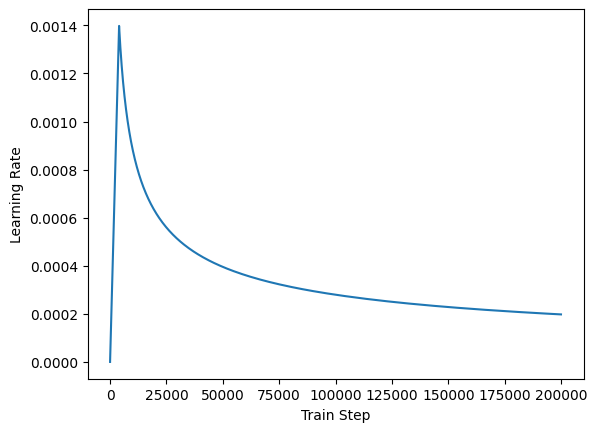

In [35]:
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

## compile

ÏÜêÏã§ Ìï®ÏàòÏôÄ Ïª§Ïä§ÌÖÄ Îêú ÌïôÏäµÎ•†(learning rate)ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ Ïª¥ÌååÏùºÌï©ÎãàÎã§.






In [36]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])
print("Ïäù=3")

Ïäù=3


## model.fit

In [37]:
EPOCHS = 10
model.fit(dataset, epochs=EPOCHS, verbose=1)

Epoch 1/10
690/690 [==============================] - 568s 815ms/step - loss: 2.1099 - accuracy: 0.0443
Epoch 2/10
690/690 [==============================] - 539s 781ms/step - loss: 1.5020 - accuracy: 0.0787
Epoch 3/10
690/690 [==============================] - 648s 939ms/step - loss: 1.3980 - accuracy: 0.0858
Epoch 4/10
690/690 [==============================] - 611s 885ms/step - loss: 1.3386 - accuracy: 0.0900
Epoch 5/10
690/690 [==============================] - 673s 976ms/step - loss: 1.2872 - accuracy: 0.0941
Epoch 6/10
690/690 [==============================] - 615s 891ms/step - loss: 1.2399 - accuracy: 0.0979
Epoch 7/10
690/690 [==============================] - 563s 815ms/step - loss: 1.1862 - accuracy: 0.1018
Epoch 8/10
690/690 [==============================] - 563s 816ms/step - loss: 1.1254 - accuracy: 0.1071
Epoch 9/10
690/690 [==============================] - 592s 857ms/step - loss: 1.0690 - accuracy: 0.1127
Epoch 10/10
690/690 [==============================] - 542s 786m

## Inference (chatbot Test)


ÏòàÏ∏°(inference) Îã®Í≥ÑÎäî Í∏∞Î≥∏Ï†ÅÏúºÎ°ú Îã§ÏùåÍ≥º Í∞ôÏùÄ Í≥ºÏ†ïÏùÑ Í±∞Ïπ©ÎãàÎã§.

1. ÏÉàÎ°úÏö¥ ÏûÖÎ†• Î¨∏Ïû•Ïóê ÎåÄÌï¥ÏÑúÎäî ÌõàÎ†® ÎïåÏôÄ ÎèôÏùºÌïú Ï†ÑÏ≤òÎ¶¨Î•º Í±∞ÏπúÎã§.
2. ÏûÖÎ†• Î¨∏Ïû•ÏùÑ ÌÜ†ÌÅ¨ÎÇòÏù¥ÏßïÌïòÍ≥†, START_TOKENÍ≥º END_TOKENÏùÑ Ï∂îÍ∞ÄÌïúÎã§.
3. Ìå®Îî© ÎßàÏä§ÌÇπÍ≥º Î£© Ïñ¥Ìó§Îìú ÎßàÏä§ÌÇπÏùÑ Í≥ÑÏÇ∞ÌïúÎã§.
4. ÎîîÏΩîÎçîÎäî ÏûÖÎ†• ÏãúÌÄÄÏä§Î°úÎ∂ÄÌÑ∞ Îã§Ïùå Îã®Ïñ¥Î•º ÏòàÏ∏°ÌïúÎã§.
5. ÎîîÏΩîÎçîÎäî ÏòàÏ∏°Îêú Îã§Ïùå Îã®Ïñ¥Î•º Í∏∞Ï°¥Ïùò ÏûÖÎ†• ÏãúÌÄÄÏä§Ïóê Ï∂îÍ∞ÄÌïòÏó¨ ÏÉàÎ°úÏö¥ ÏûÖÎ†•ÏúºÎ°ú ÏÇ¨Ïö©ÌïúÎã§.
6. END_TOKENÏù¥ ÏòàÏ∏°ÎêòÍ±∞ÎÇò Î¨∏Ïû•Ïùò ÏµúÎåÄ Í∏∏Ïù¥Ïóê ÎèÑÎã¨ÌïòÎ©¥ ÎîîÏΩîÎçîÎäî ÎèôÏûëÏùÑ Î©àÏ∂òÎã§.

ÏúÑÏùò Í≥ºÏ†ïÏùÑ Î™®Îëê Îã¥ÏùÄ decoder_inference() Ìï®ÏàòÎ•º ÎßåÎì≠ÎãàÎã§.

In [38]:
def decoder_inference(sentence):
  sentence = preprocess_sentence(sentence)

  # ÏûÖÎ†•Îêú Î¨∏Ïû•ÏùÑ Ï†ïÏàò Ïù∏ÏΩîÎî© ÌõÑ, ÏãúÏûë ÌÜ†ÌÅ∞Í≥º Ï¢ÖÎ£å ÌÜ†ÌÅ∞ÏùÑ ÏïûÎí§Î°ú Ï∂îÍ∞Ä.
  # ex) Where have you been? ‚Üí [[8331   86   30    5 1059    7 8332]]
  sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

  # ÎîîÏΩîÎçîÏùò ÌòÑÏû¨ÍπåÏßÄÏùò ÏòàÏ∏°Ìïú Ï∂úÎ†• ÏãúÌÄÄÏä§Í∞Ä ÏßÄÏÜçÏ†ÅÏúºÎ°ú Ï†ÄÏû•ÎêòÎäî Î≥ÄÏàò.
  # Ï≤òÏùåÏóêÎäî ÏòàÏ∏°Ìïú ÎÇ¥Ïö©Ïù¥ ÏóÜÏùåÏúºÎ°ú ÏãúÏûë ÌÜ†ÌÅ∞Îßå Î≥ÑÎèÑ Ï†ÄÏû•. ex) 8331
  output_sequence = tf.expand_dims(START_TOKEN, 0)

  # ÎîîÏΩîÎçîÏùò Ïù∏ÌçºÎü∞Ïä§ Îã®Í≥Ñ
  for i in range(MAX_LENGTH):
    # ÎîîÏΩîÎçîÎäî ÏµúÎåÄ MAX_LENGTHÏùò Í∏∏Ïù¥ÎßåÌÅº Îã§Ïùå Îã®Ïñ¥ ÏòàÏ∏°ÏùÑ Î∞òÎ≥µÌï©ÎãàÎã§.
    predictions = model(inputs=[sentence, output_sequence], training=False)
    predictions = predictions[:, -1:, :]

    # ÌòÑÏû¨ ÏòàÏ∏°Ìïú Îã®Ïñ¥Ïùò Ï†ïÏàò
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # ÎßåÏïΩ ÌòÑÏû¨ ÏòàÏ∏°Ìïú Îã®Ïñ¥Í∞Ä Ï¢ÖÎ£å ÌÜ†ÌÅ∞Ïù¥ÎùºÎ©¥ forÎ¨∏ÏùÑ Ï¢ÖÎ£å
    if tf.equal(predicted_id, END_TOKEN[0]):
      break

    # ÏòàÏ∏°Ìïú Îã®Ïñ¥Îì§ÏùÄ ÏßÄÏÜçÏ†ÅÏúºÎ°ú output_sequenceÏóê Ï∂îÍ∞ÄÎê©ÎãàÎã§.
    # Ïù¥ output_sequenceÎäî Îã§Ïãú ÎîîÏΩîÎçîÏùò ÏûÖÎ†•Ïù¥ Îê©ÎãàÎã§.
    output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

  return tf.squeeze(output_sequence, axis=0)
print("Ïäù=3")

Ïäù=3


ÏûÑÏùòÏùò ÏûÖÎ†• Î¨∏Ïû•Ïóê ÎåÄÌï¥ÏÑú decoder_inference() Ìï®ÏàòÎ•º Ìò∏Ï∂úÌïòÏó¨ Ï±óÎ¥áÏùò ÎåÄÎãµÏùÑ ÏñªÎäî sentence_generation() Ìï®ÏàòÎ•º ÎßåÎì≠ÎãàÎã§.

In [39]:
def sentence_generation(sentence):
  # ÏûÖÎ†• Î¨∏Ïû•Ïóê ÎåÄÌï¥ÏÑú ÎîîÏΩîÎçîÎ•º ÎèôÏûë ÏãúÏºú ÏòàÏ∏°Îêú Ï†ïÏàò ÏãúÌÄÄÏä§Î•º Î¶¨ÌÑ¥Î∞õÏäµÎãàÎã§.
  prediction = decoder_inference(sentence)

  # Ï†ïÏàò ÏãúÌÄÄÏä§Î•º Îã§Ïãú ÌÖçÏä§Ìä∏ ÏãúÌÄÄÏä§Î°ú Î≥ÄÌôòÌï©ÎãàÎã§.
  predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

  print('ÏûÖÎ†• : {}'.format(sentence))
  print('Ï∂úÎ†• : {}'.format(predicted_sentence))

  return predicted_sentence
print("Ïäù=3")

Ïäù=3


ÏûÑÏùòÏùò Î¨∏Ïû•ÏúºÎ°úÎ∂ÄÌÑ∞ Ï±óÎ¥áÏùò ÎåÄÎãµÏùÑ ÏñªÏñ¥Î¥ÖÏãúÎã§.

In [40]:
sentence_generation('Where have you been?')

ÏûÖÎ†• : Where have you been?
Ï∂úÎ†• : i m not going to be alone .


'i m not going to be alone .'